# **PricePredictor Pro: A Real Estate Price Estimator**

**Author:** Ayesha Saleem  

[![GitHub](https://img.shields.io/badge/GitHub-Visit_Profile-181717?style=flat&logo=github&logoColor=white)](https://github.com/aysh34)

## **Problem Statement**
Build a regression model that can accurately predict house prices in Bengaluru.

## **Data Description**
- Area_type - Description of the area
- Availability - When it can be possessed or when it is ready
- Location - Where it is located in Bengaluru
- Size - BHK or Bedrooms
- Society - To which society it belongs
- Total_sqft - Size of the property in sq.ft
- Bath - No. of Bathrooms
- Balcony - No. of the Balcony
- Price - Value of the property in lakhs (Indian Rupee - ₹)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Basic information about our dataset

print("===== BASIC DATASET INFORMATION =====\n")

print(f"Dataset shape: {df1.shape}")

print(f"\n===== Column names =====\n{df1.columns.tolist()}")

print(f"\n====== Data types =====\n{df1.dtypes} ")

print(f"\n===== Missing values =====\n{df1.isnull().sum()}")

print(f"\n===== Missing percentage =====\n{(df1.isnull().sum()/len(df1))*100}")

print(f"\n===== Duplicate rows =====\n{df1.duplicated().sum()}")

print(f"\n===== Data Description =====\n{df1.describe().T}")

===== BASIC DATASET INFORMATION =====

Dataset shape: (13320, 9)

===== Column names =====
['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']

====== Data types =====
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object 

===== Missing values =====
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

===== Missing percentage =====
area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

===== Duplicate rows =====
529

===== 

## **Data Cleaning & Feature Engineering**

In [5]:
df1 = df1.drop_duplicates()

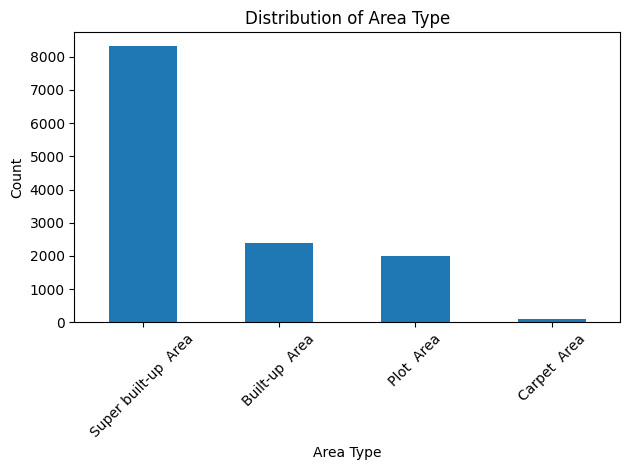

In [6]:
df1['area_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

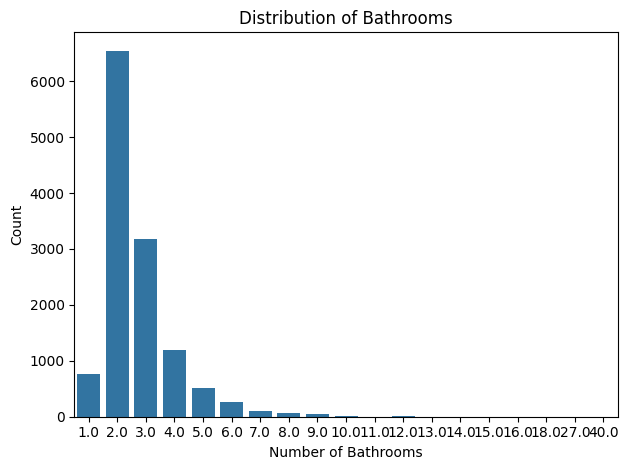

In [7]:
sns.countplot(x='bath', data=df1)
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms') 
plt.ylabel('Count')
plt.tight_layout()
plt.show()

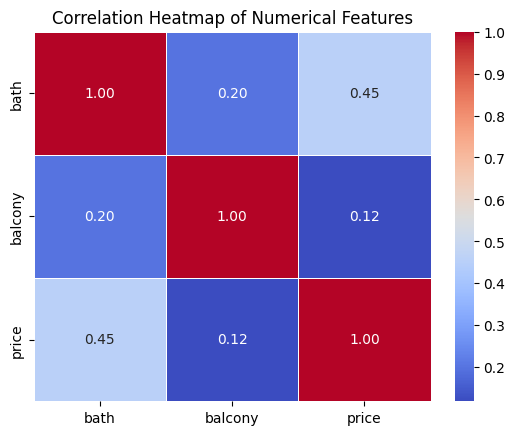

In [8]:
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [9]:
# society has almost 41% null values so drop it, also drop availability,society,area_type
df2 = df1.drop(columns=["availability","society","area_type","balcony"])

In [10]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2 = df2.dropna(subset=['location', 'size', 'total_sqft', 'price', 'bath'])

In [12]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## **Let's examine each feature one by one**

#### LOCATION

In [14]:
df2.location.value_counts()

location
Whitefield                         517
Sarjapur  Road                     372
Electronic City                    287
Kanakpura Road                     242
Thanisandra                        228
                                  ... 
MM Layout                            1
Devarabeesana Halli                  1
beml layout, basaveshwara nagar      1
Sadhguru Layout                      1
Chikbasavanapura                     1
Name: count, Length: 1304, dtype: int64

##### We need to apply Dimensionality Reduction here to reduce number of locations.

In [15]:
df2.location = df2.location.apply(lambda x: x.strip())

In [16]:
location_counts = df2.groupby("location")['location'].agg('count').sort_values(ascending=False)
location_counts

location
Whitefield                            518
Sarjapur  Road                        372
Electronic City                       289
Kanakpura Road                        242
Thanisandra                           231
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [17]:
location_counts[location_counts <= 10]

location
Narayanapura                          10
Vasanthapura                          10
Kalkere                               10
Pattandur Agrahara                    10
Marsur                                10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1060, dtype: int64

In [18]:
# Grouping Rare Locations(1027 locations with <= 10 entries) as "other"

location_counts_less_than_10 = location_counts[location_counts <= 10].index.to_list()

In [19]:
location_counts_less_than_10

['Narayanapura',
 'Vasanthapura',
 'Kalkere',
 'Pattandur Agrahara',
 'Marsur',
 'Sadashiva Nagar',
 'BTM 1st Stage',
 'BEML Layout',
 'Gunjur Palya',
 'Ganga Nagar',
 'Sector 1 HSR Layout',
 'Dairy Circle',
 'Dodsworth Layout',
 'Nagadevanahalli',
 'Nagappa Reddy Layout',
 'Naganathapura',
 '1st Block Koramangala',
 'Yemlur',
 'Medahalli',
 'Volagerekallahalli',
 'Chennammana Kere',
 'Banagiri Nagar',
 'Lingarajapuram',
 'Richmond Town',
 'Peenya',
 'Ejipura',
 'B Narayanapura',
 'Kamakshipalya',
 '2nd Phase JP Nagar',
 'Vignana Nagar',
 'Mathikere',
 'Gollahalli',
 'Basapura',
 '4th Block Koramangala',
 'Vishwanatha Nagenahalli',
 'Jakkur Plantation',
 'Kaverappa Layout',
 'Roopena Agrahara',
 'MS Pallya',
 'Hongasandra',
 'Byadarahalli',
 'Chandra Layout',
 'Mahalakshmi Puram',
 'Sidedahalli',
 'Dodda Nekkundi Extension',
 'Sarjapur Road,',
 'Huskur',
 'Hoysalanagar',
 'Vajarahalli',
 'Kodbisanhalli',
 'Akshayanagara East',
 'Basavanapura',
 '1st Block HRBR Layout',
 'Shikaripalya',

In [20]:
df2['location'] = df2['location'].apply(lambda x:"other" if x in location_counts_less_than_10 else x)

In [21]:
# Now let's see how many unique locations are left 

len(df2.location.value_counts())

234

In [22]:
df2.sample(3)

,location,size,total_sqft,bath,price
2531,Yeshwanthpur,2 BHK,1195,2.0,100.00
12505,Mysore Road,2 BHK,1175,2.0,86.68
12166,Thyagaraja Nagar,2 BHK,1040,2.0,68.00


#### Before grouping
1254 unique locations
#### After grouping
 228 unique locations

### SIZE

In [23]:
df2['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13314        3 BHK
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
Name: size, Length: 12717, dtype: object

In [24]:
# I am going to create a 'BHK' column from existing 'size' column because of inconsistencies in the size column.

df3 = df2.copy()
df3['BHK'] = df3['size'].apply(lambda x: x.split(" ")[0])

In [25]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


#### TOTAL-SQFT

In [26]:
df3['total_sqft'].value_counts().index

Index(['1200', '1100', '1500', '2400', '600', '1000', '1350', '1050', '1250',
       '1300',
       ...
       '16335', '886', '1443', '4350', '1400 - 1421', '567', '2505', '2453',
       '4723', '3504'],
      dtype='object', name='total_sqft', length=2067)

There are a lot of inconsistencies in this column, we first have to tackle this.

In [27]:
def clean_total_sqft(x):
    try:
        if '-' in x:
            x = x.split('-')
            if len(x) == 2:
                return (float(x[0]) + float(x[1]))/2
        return float(x)
    except:
        num = '' # to handle '167Sq. Meter' or '1331.95'
        for ch in x:
            if ch.isdigit() or ch == '.':
                num += ch
            else:
                break
        try: 
            return float(num)
        except:
            return None

In [28]:
df3['total_sqft'] = df3['total_sqft'].apply(clean_total_sqft)

In [29]:
df3['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
Name: total_sqft, Length: 12717, dtype: float64

#### Price

In [30]:
df3['price'].value_counts().index

Index([  75.0,   65.0,   55.0,   60.0,   45.0,   50.0,   70.0,   90.0,   85.0,
        110.0,
       ...
        221.0,  71.58, 59.135,  49.53,  293.0,  64.99,   43.7,  44.75, 2800.0,
        488.0],
      dtype='float64', name='price', length=1955)

In [31]:
df3['price'].describe()

count    12717.000000
mean       114.144276
std        151.604315
min          8.000000
25%         50.000000
50%         73.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

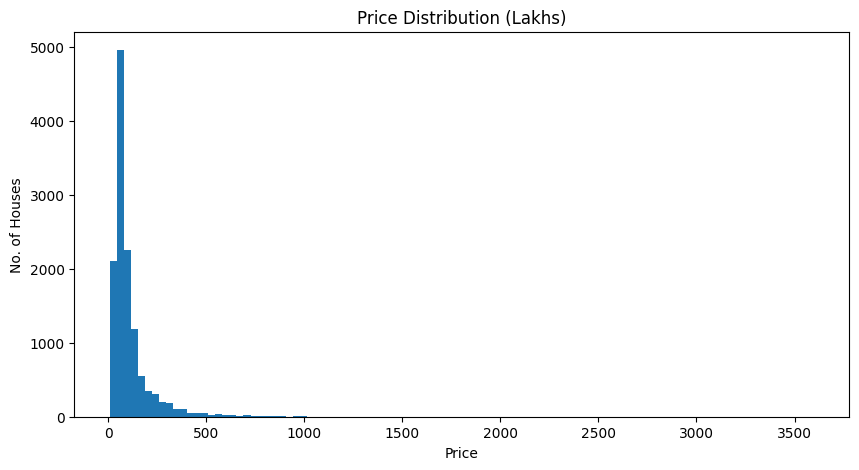

In [32]:
plt.figure(figsize=(10,5))
plt.hist(df3['price'], bins=100)
plt.title("Price Distribution (Lakhs)")
plt.xlabel("Price")
plt.ylabel("No. of Houses")
plt.show()

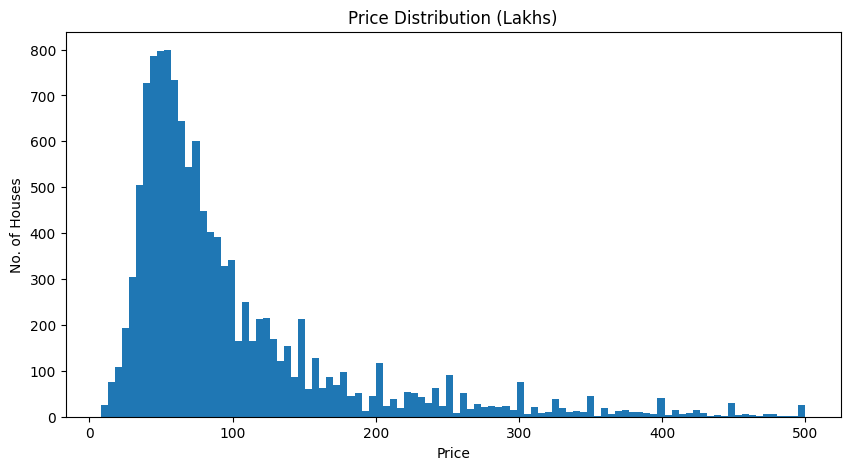

In [33]:
# core distribution without extreme outliers

plt.figure(figsize=(10,5))
plt.hist(df3[df3['price'] <= 500]['price'], bins=100)
plt.title("Price Distribution (Lakhs)")
plt.xlabel("Price")
plt.ylabel("No. of Houses")
plt.show()

Prices like 2912.000000 Cr are not common residential data (likely outliers). Regression models (especially Linear) get skewed due to these. So, its better to clip or remove such rare values if they aren't the norm.

In [34]:
df3.shape

(12717, 6)

In [35]:
# Homes more than ₹10 Cr = 1000 Lakhs

len(df3[df3['price'] > 1000])

45

In [36]:
# let's keeps only rows where price is less than or equal to ₹1000 lakhs (₹10 crore)
df4 = df3.copy()
df4 = df4[df4['price'] <= 1000]

In [37]:
df4.shape

(12672, 6)

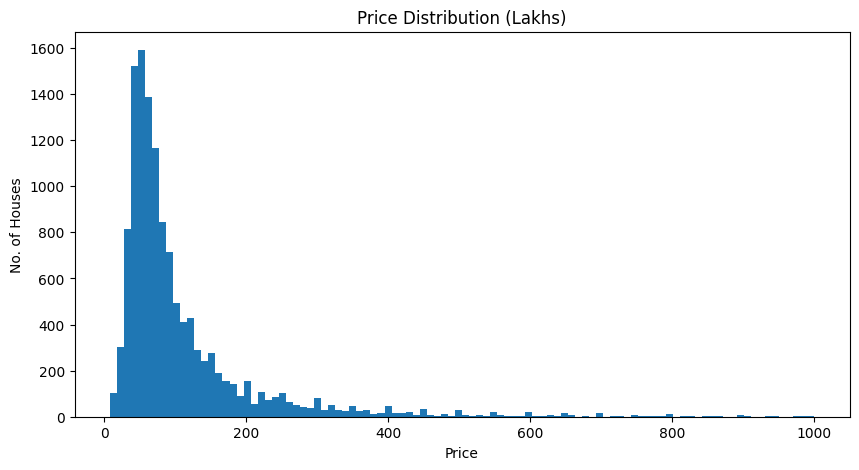

In [38]:
plt.figure(figsize=(10,5))
plt.hist(df4['price'], bins=100)
plt.title("Price Distribution (Lakhs)")
plt.xlabel("Price")
plt.ylabel("No. of Houses")
plt.show()

Here, I am adding a new feature called Price per Square Feet

In [39]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']* 100000 / df5['total_sqft']

In [40]:
df5['BHK'] = pd.to_numeric(df5['BHK'],errors='coerce')

In [41]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [42]:
df5.shape

(12672, 7)

### **Remove outliers or data errors**

A typical 1 BHK apartment in India generally ranges from 400 to 600 square feet, while a 2 BHK can range from 650 to 1000 square feet or more, depending on the builder and location. 

In [43]:
df5['BHK'].describe()

count    12672.000000
mean         2.809265
std          1.307385
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: BHK, dtype: float64

In [44]:
outliers = df5[df5['total_sqft']/df5['BHK'] < 350]

In [45]:
outliers

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
26,Electronic City,2 BHK,660.0,1.0,23.1,2,3500.000000
29,Electronic City,3 BHK,1025.0,2.0,47.0,3,4585.365854
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
...,...,...,...,...,...,...,...
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13300,Hosakerehalli,5 Bedroom,1500.0,6.0,145.0,5,9666.666667
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [46]:
# Remove properties with unrealistic sqft per bedroom (too small or too large)

df6 = df5[(df5['total_sqft']/df5['BHK'] >= 300) & 
                (df5['total_sqft']/df5['BHK'] <= 3000)]

In [47]:
df6.shape

(11887, 7)

In [48]:
df6['price_per_sqft'].describe()

count     11887.000000
mean       6291.829286
std        3938.399131
min         500.000000
25%        4250.000000
50%        5319.148936
75%        6944.444444
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
def remove_pps_outliers_iqr(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        q1 = subdf['price_per_sqft'].quantile(0.25)
        q3 = subdf['price_per_sqft'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        reduced_df = subdf[(subdf['price_per_sqft'] >= lower_bound) & (subdf['price_per_sqft'] <= upper_bound)]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
        
    return df_out
df7 = remove_pps_outliers_iqr(df6)

In [50]:
df7.shape

(11109, 7)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like.

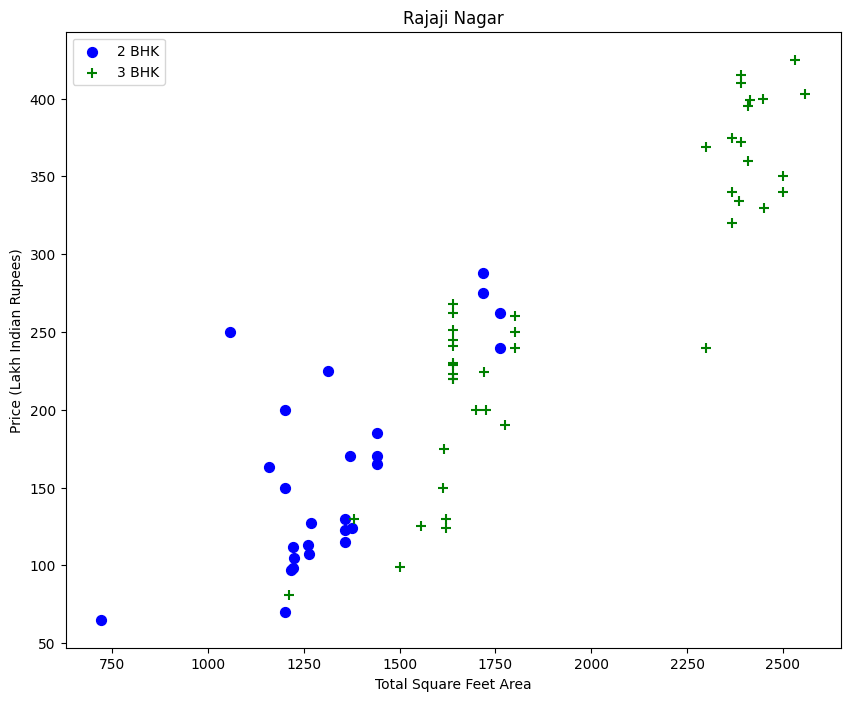

In [51]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(10,8))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

We should remove properties where for same location, the price of higher BHK (3 bedroom apartment) is less than than mean price_per_sqft of lower BHK (2 bedroom apartment) with same square ft area.

In [52]:
def remove_extreme_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                bad_index = bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                exclude_indices = np.append(exclude_indices, bad_index)

    return df.drop(exclude_indices, axis='index')

In [53]:
df8 = remove_extreme_bhk_outliers(df7)

In [54]:
df8.shape

(7958, 7)

In [55]:
def remove_outliers(df, z_thresh=3):
    df = df.copy()
    df['zscore'] = df.groupby(['location', 'BHK'])['price_per_sqft']\
                     .transform(lambda x: (x - x.mean()) / x.std())
    return df[df['zscore'].abs() < z_thresh].drop(columns=['zscore'])


In [56]:
df8 = remove_outliers(df8)

In [57]:
df8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,4 Bedroom,2400.0,4.0,450.0,4,18750.000000
4,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000
...,...,...,...,...,...,...,...
11099,other,2 BHK,1155.0,2.0,64.0,2,5541.125541
11101,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
11102,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
11105,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


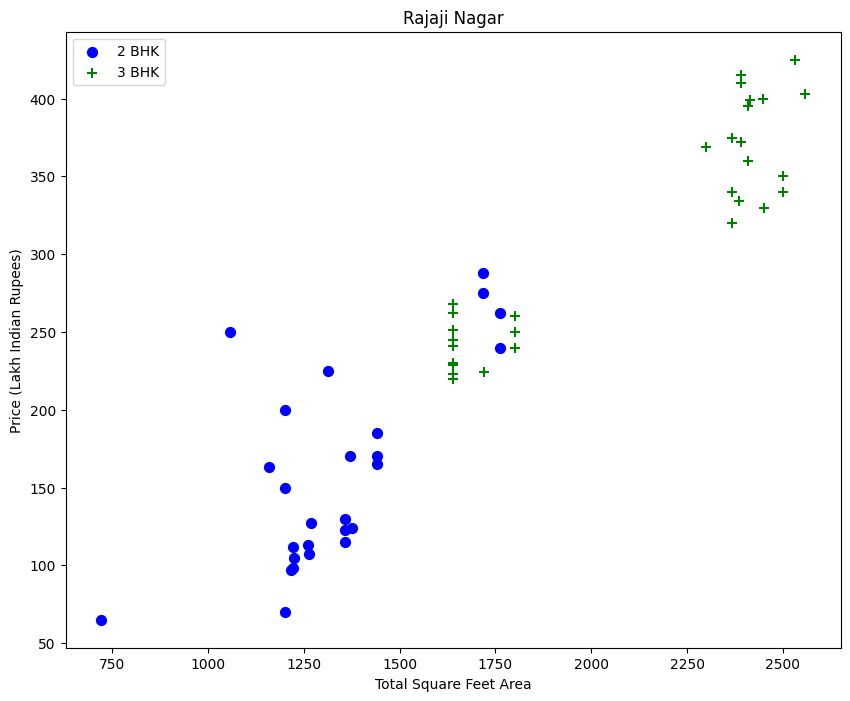

In [58]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(10,8))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")

In [59]:
df8[df8.bath > df8.BHK + 2] # It is unusual to have 2 more bathrooms than number of bedrooms in a home

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5792,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7503,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9255,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [60]:
df9 = df8[df8.bath < df8.BHK + 2]

In [61]:
df9.shape

(7625, 7)

In [62]:
df10 = df9.drop(columns=['size','price_per_sqft'],axis=1)

In [63]:
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,60.0,2


## **Use One Hot Encoding For Location**

In [64]:
dummies = pd.get_dummies(df10.location)

In [65]:
df11 = pd.concat([df10,dummies.drop('other',axis=1)],axis=1,)

In [66]:
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,2400.0,4.0,450.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1000.0,3.0,60.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
df12= df11.drop('location',axis=1)

In [68]:
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2400.0,4.0,450.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1000.0,3.0,60.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
